This Jupyter Notebook contains code and analysis for a binary classification problem using the UCI Heart Disease dataset. The covers interpretation using SHAP (SHapley Additive exPlanations) values.The notebook includes visualizations of feature importance and individual instance explanations using SHAP values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle


import shap
from sklearn.model_selection import train_test_split


import joblib

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
shap.initjs()

### Load Dataset

In [3]:
# Load Dataset
df = pd.read_csv("../data/uci_heart_disease.processed.tsv", sep="\t")

# Define relevant features
# fmt:off
numeric_features = ["age", "trestbps", "thalach", "oldpeak", "slope"]
binary_features = ["sex", "cp_1", "cp_2", "cp_3", "restecg_1", "restecg_2", "exang"]
features = numeric_features + binary_features
# fmt:on
target = "num_01"


np.random.seed(123)
# Split Train and test datasets
X = df[features]
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

### Load trained model

In [4]:
model_filename = "../models/best_binary_classifier.pkl"
with open(model_filename, "rb") as f:
    pipeline = joblib.load(f)

classifier = pipeline["classifier"]
preporcessor = pipeline["preprocessor"]

### Create and store SHAP explainer

In [5]:
explainer = shap.KernelExplainer(
    classifier.predict, preporcessor.transform(X_train), feature_names=features
)

with open("../models/best_binary_classifier_explainer.pkl", "wb") as f:
    # explainer.save(f)
    pickle.dump(explainer, f)

Using 484 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


### Feature importance for the entire model

  0%|          | 0/208 [00:00<?, ?it/s]

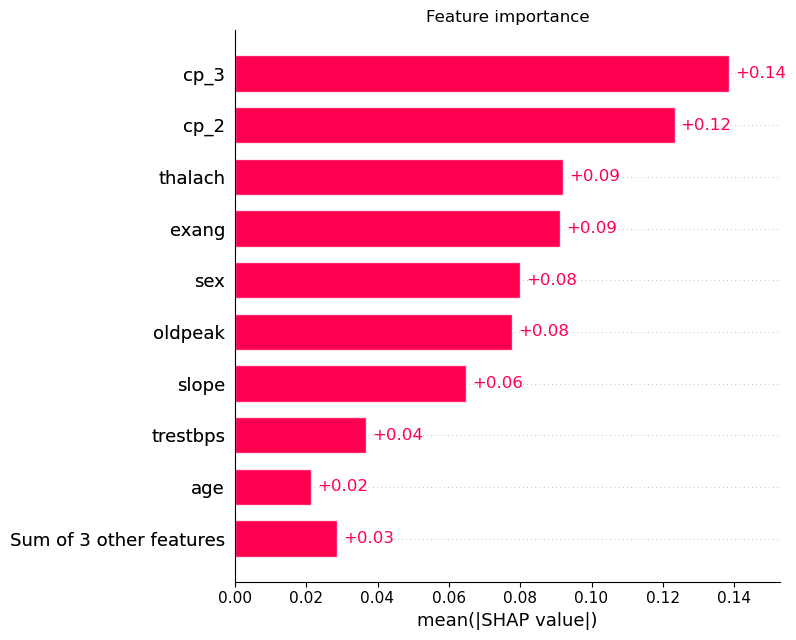

In [6]:
shap_values = explainer(preporcessor.transform(X_test))
shap.plots.bar(shap_values, show=False)
plt.title("Feature importance")
plt.tight_layout()
plt.savefig("../figures/42.binary_classifier_shap_values.png")

### Feature importance for a single observation. This plots will be used in the CDSS (streamlit app)

In [7]:
# Get model predictions for the test data
cdss_data = X_test.iloc[[0], :]
predictions = pipeline.predict(cdss_data)

In [8]:
# Calculate SHAP values for the test data
shap_values = explainer(preporcessor.transform(cdss_data))

  0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Create a force plot for the testing observation
shap.force_plot(explainer.expected_value, shap_values[0].values, cdss_data)

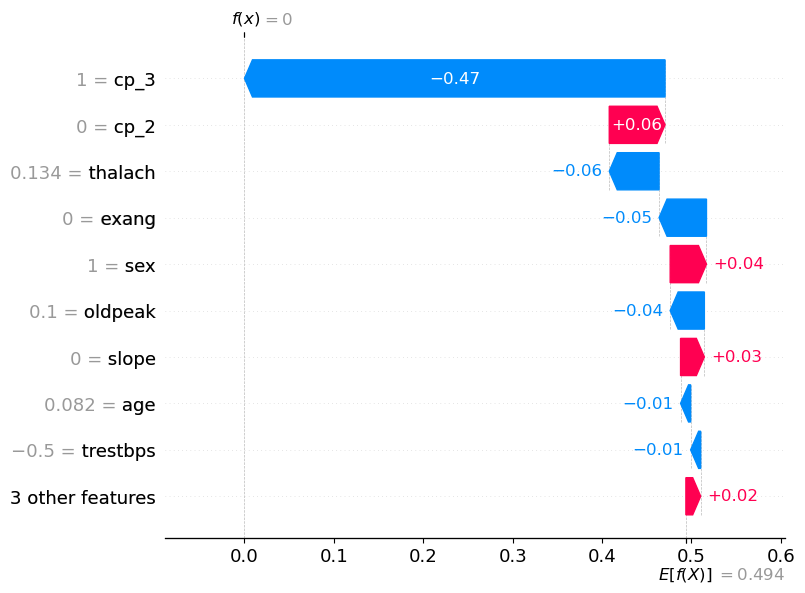

In [10]:
shap.plots.waterfall(shap_values[0])